## Overall Structure 

1. Import Libraries 
2. Overview of Cleaned Data  
3. Response variable 
4. Explore Numerical variables 
- A. Data distribution 
- B. Correlations among variables  
- C. Relationships with Loan Default 
5. Explore Categorical variables 
- A. Data distribution 
- B. Relationships with Loan Default 

## 1. Import libraries

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Display settings for data exploration
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimals

## 2. Overview of Cleaned Data

In [3]:
credit_data = pd.read_csv('cleaned-dataset.csv',index_col= 0)
credit_data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Monthly Income,Debt-to-Income Ratio,Credit Utilization Ratio
0,Fully Paid,445412.00,Short Term,709.00,1167493.00,7-9 years,Home Mortgage,Big Purchase,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00,97291.08,0.05,0.55
3,Fully Paid,347666.00,Long Term,721.00,806949.00,2-3 years,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00,67245.75,0.13,0.66
6,Fully Paid,217646.00,Short Term,730.00,1184194.00,0-1 year,Home Mortgage,Debt Consolidation,10855.08,19.60,13.00,1.00,122170.00,272052.00,1.00,0.00,98682.83,0.11,0.45
8,Fully Paid,548746.00,Short Term,678.00,2559110.00,2-3 years,Rent,Debt Consolidation,18660.28,22.60,4.00,0.00,437171.00,555038.00,0.00,0.00,213259.17,0.09,0.79
9,Fully Paid,215952.00,Short Term,739.00,1454735.00,0-1 year,Rent,Debt Consolidation,39277.75,13.90,20.00,0.00,669560.00,1021460.00,0.00,0.00,121227.92,0.32,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Fully Paid,251020.00,Long Term,700.00,648508.00,7-9 years,Rent,Debt Consolidation,7836.17,11.20,3.00,0.00,352659.00,418374.00,0.00,0.00,54042.33,0.15,0.80
19995,Fully Paid,89100.00,Short Term,703.00,1077414.00,7-9 years,Rent,Essential Needs,15173.59,19.90,10.00,0.00,272688.00,362912.00,0.00,0.00,89784.50,0.17,0.75
19997,Fully Paid,550418.00,Long Term,675.00,1134072.00,2-3 years,Home Mortgage,Debt Consolidation,13325.27,29.40,5.00,0.00,77634.00,102850.00,0.00,0.00,94506.00,0.14,0.75
19998,Fully Paid,91124.00,Short Term,709.00,1349266.00,2-3 years,Rent,Debt Consolidation,26422.92,11.00,14.00,0.00,69787.00,340956.00,0.00,0.00,112438.83,0.23,0.20


In [4]:
# Initialize lists to store numerical and categorical column names
num_columns = []
cat_columns = []

for col in credit_data.columns:
    if credit_data[col].dtype == "float64":
        num_columns.append(col)
    else:
        cat_columns.append(col)

numericaldata = credit_data[num_columns]
categoricaldata = credit_data[cat_columns]

## 3. Response Variable

Text(0, 0.5, '')

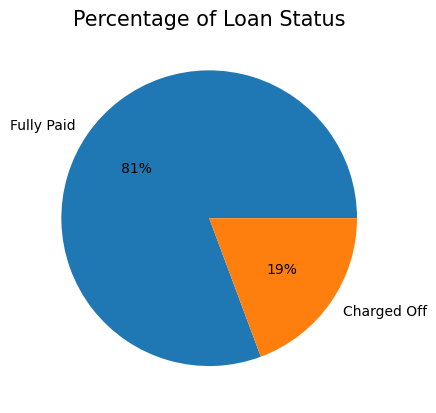

In [5]:
# Visualising Loan Status (response variable)
credit_data['Loan Status'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Percentage of Loan Status', fontsize=15)
plt.ylabel('')

This means our data is imbalanced, with Charged Off loans << Fully Paid loans. This may cause our model to be biased towards Fully Paid Loans, leading to high accuracy but poor recall. Before model training, some resampling strategies may be needed to improve classification performance. 

## 4. Exploring Numerical Features

We have the following numerical features: 
- Current Loan Amount
- Credit Score
- Annual Income
- Monthly Debt
- Years of Credit History
- Number of Open Accounts
- Number of Credit Problems
- Current Credit Balance
- Maximum Open Credit
- Bankruptcies
- Tax Liens
- Monthly Income 
- Debt to Income Ratio 
- Credit Utilisation Ratio

### A. Explore data distributions for each numerical feature

In [6]:
numericaldata.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Monthly Income,Debt-to-Income Ratio,Credit Utilization Ratio
count,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00,11544.00
mean,311809.25,718.62,1372576.17,18463.36,17.96,11.16,0.17,286220.59,623085.18,0.12,0.03,114381.35,0.17,0.49
std,185982.72,23.32,755119.13,11476.85,6.68,4.98,0.47,268429.72,563193.59,0.35,0.23,62926.59,0.08,0.20
min,15422.00,650.00,363961.72,1371.40,3.70,1.00,0.00,2872.04,22148.06,0.00,0.00,30330.14,0.00,0.00
25%,172254.50,705.00,856420.25,10333.43,13.50,8.00,0.00,112513.25,272173.00,0.00,0.00,71368.35,0.11,0.34
50%,267905.00,722.00,1196449.00,16281.86,16.80,10.00,0.00,210577.00,465487.00,0.00,0.00,99704.08,0.17,0.50
75%,432998.50,738.00,1670712.75,24155.36,21.50,14.00,0.00,371749.25,787165.50,0.00,0.00,139226.06,0.22,0.65
max,789096.00,751.00,4657658.10,59550.05,65.00,56.00,7.00,1640974.90,3550305.66,5.00,6.00,388138.17,0.40,0.80


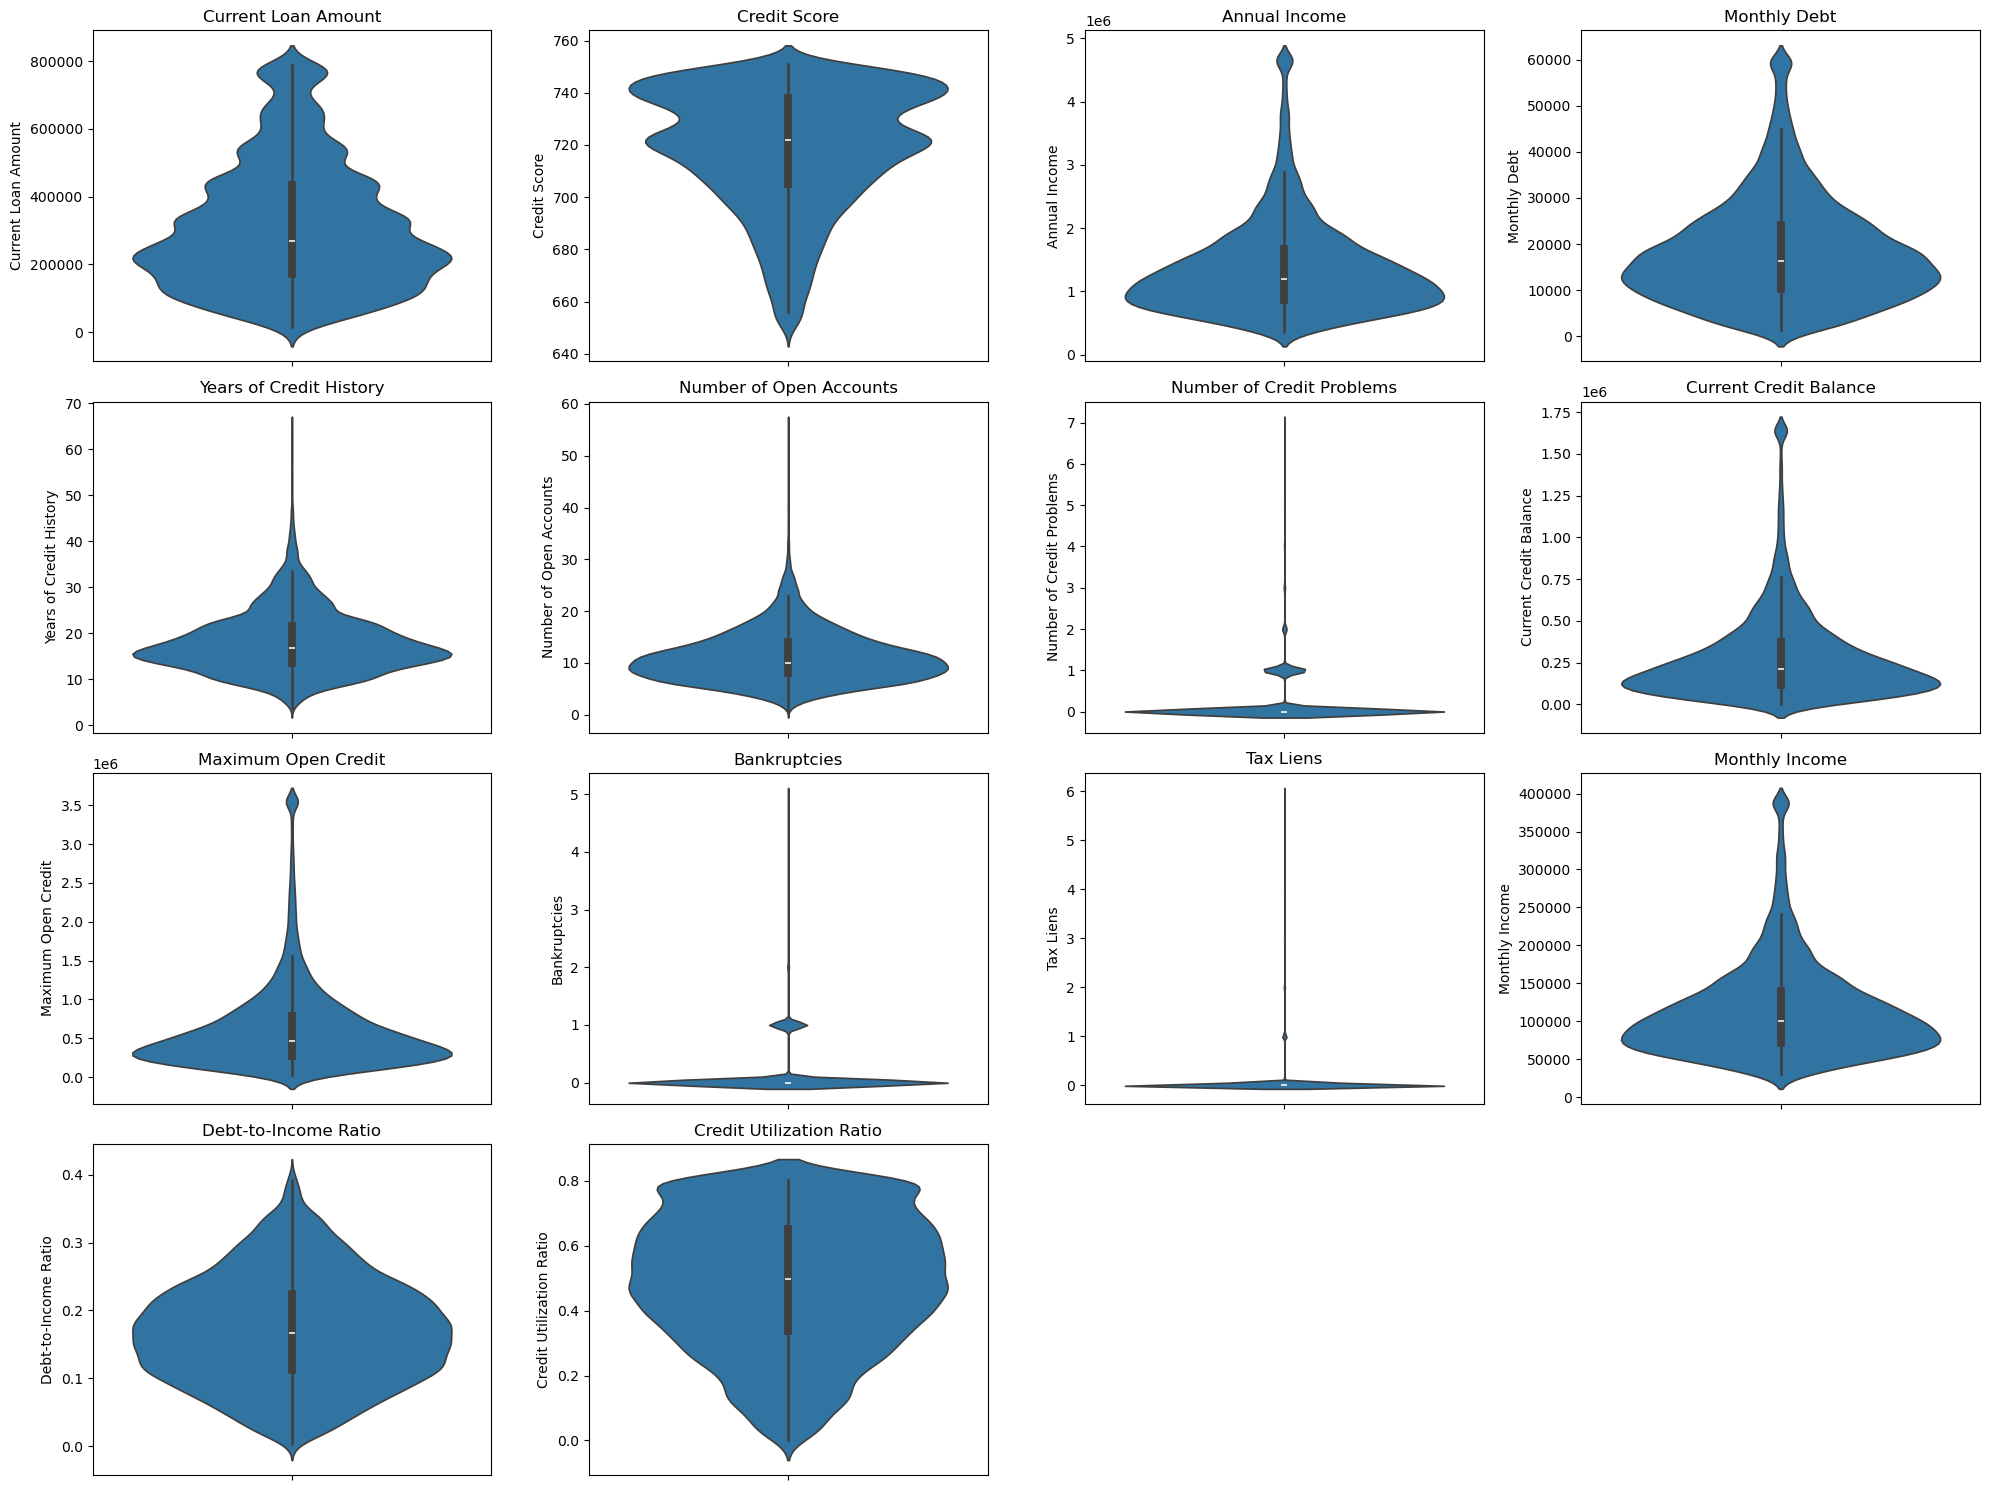

In [7]:
# Draw data distributions for each numerical feature 

counter = 0
fig = plt.figure(figsize=(20, 15))  # Adjust size as needed

for col in num_columns:
    sub = fig.add_subplot(4, 4, counter + 1)
    sb.violinplot(y=credit_data[col])
    plt.title(f'{col}')
    plt.ylabel(col)
    plt.xlabel('')  # No x-axis label since there's no grouping
    counter += 1

plt.tight_layout()
plt.show()

### B. Explore correlations among numerical features

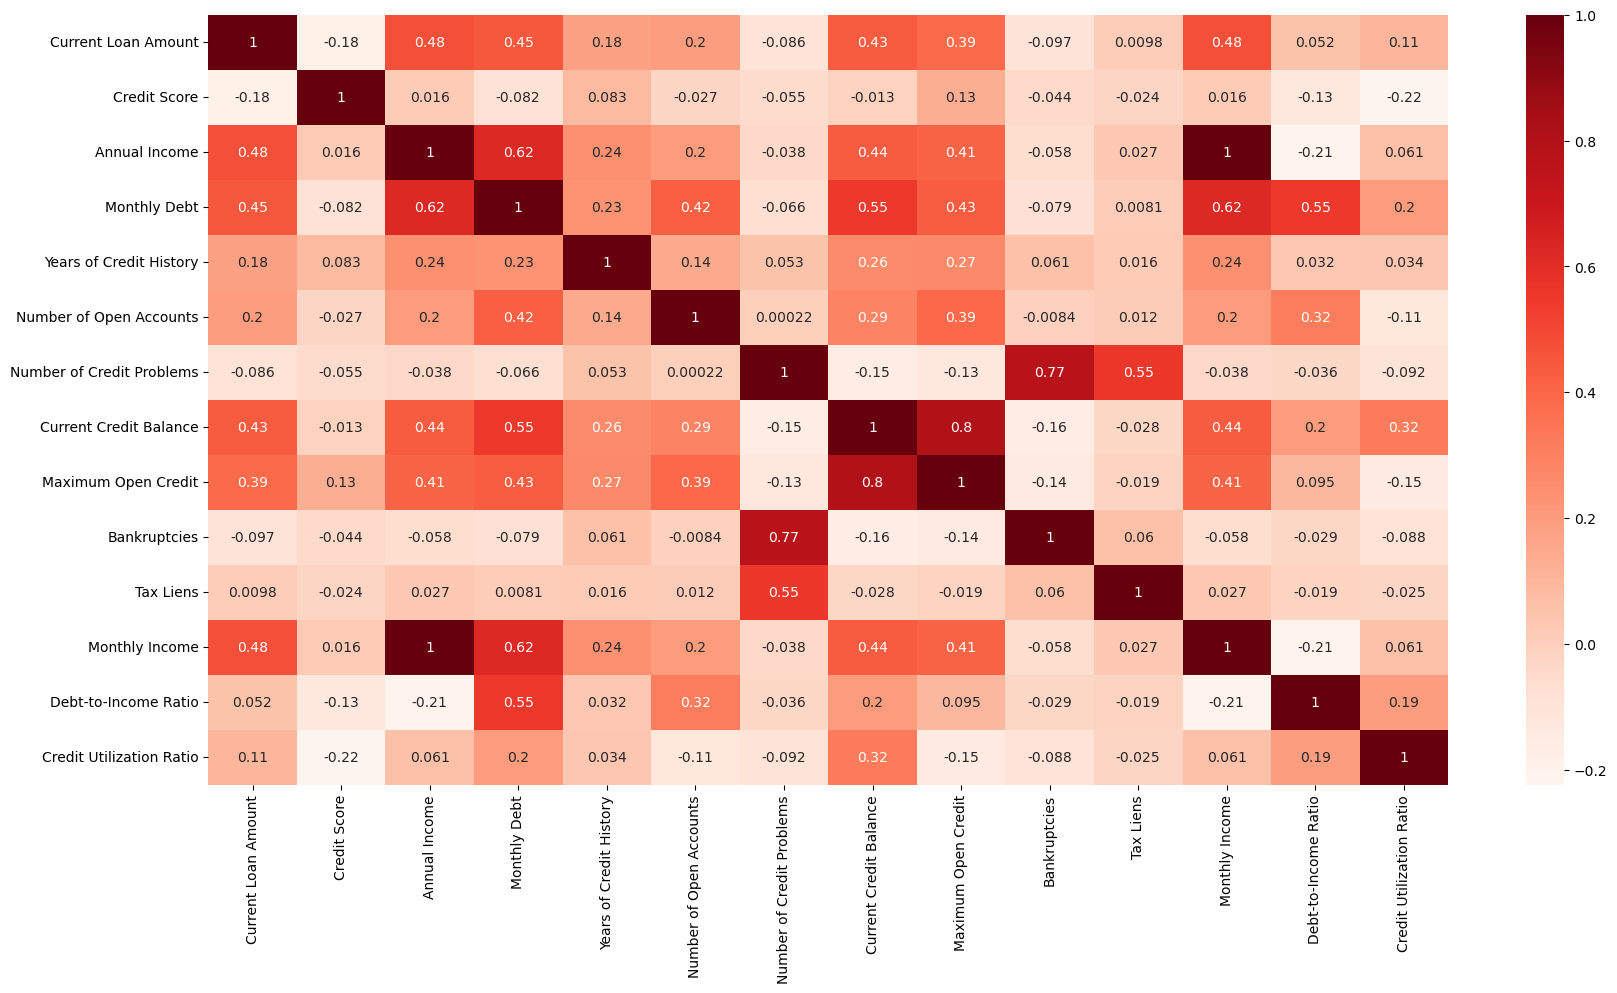

In [8]:
# Find correlations within numerical variables 
plt.figure(figsize = (20,10))

sb.heatmap(credit_data[num_columns].corr(), cmap = 'Reds', annot = True)
plt.show()

Strong Correlations 
- Maximum Open Credit with Current Credit Balance (0.8)
- Number of Credit Problems with Bankruptcies (0.77)
- Annual Income with Monthly Debt (0.62)

Moderate Correlations 
- Monthly Debt with Current Credit Balance (0.55)
- Number of Tax Liens with Number of Credit Problems (0.55)

### C. Explore relationship with Loan Default

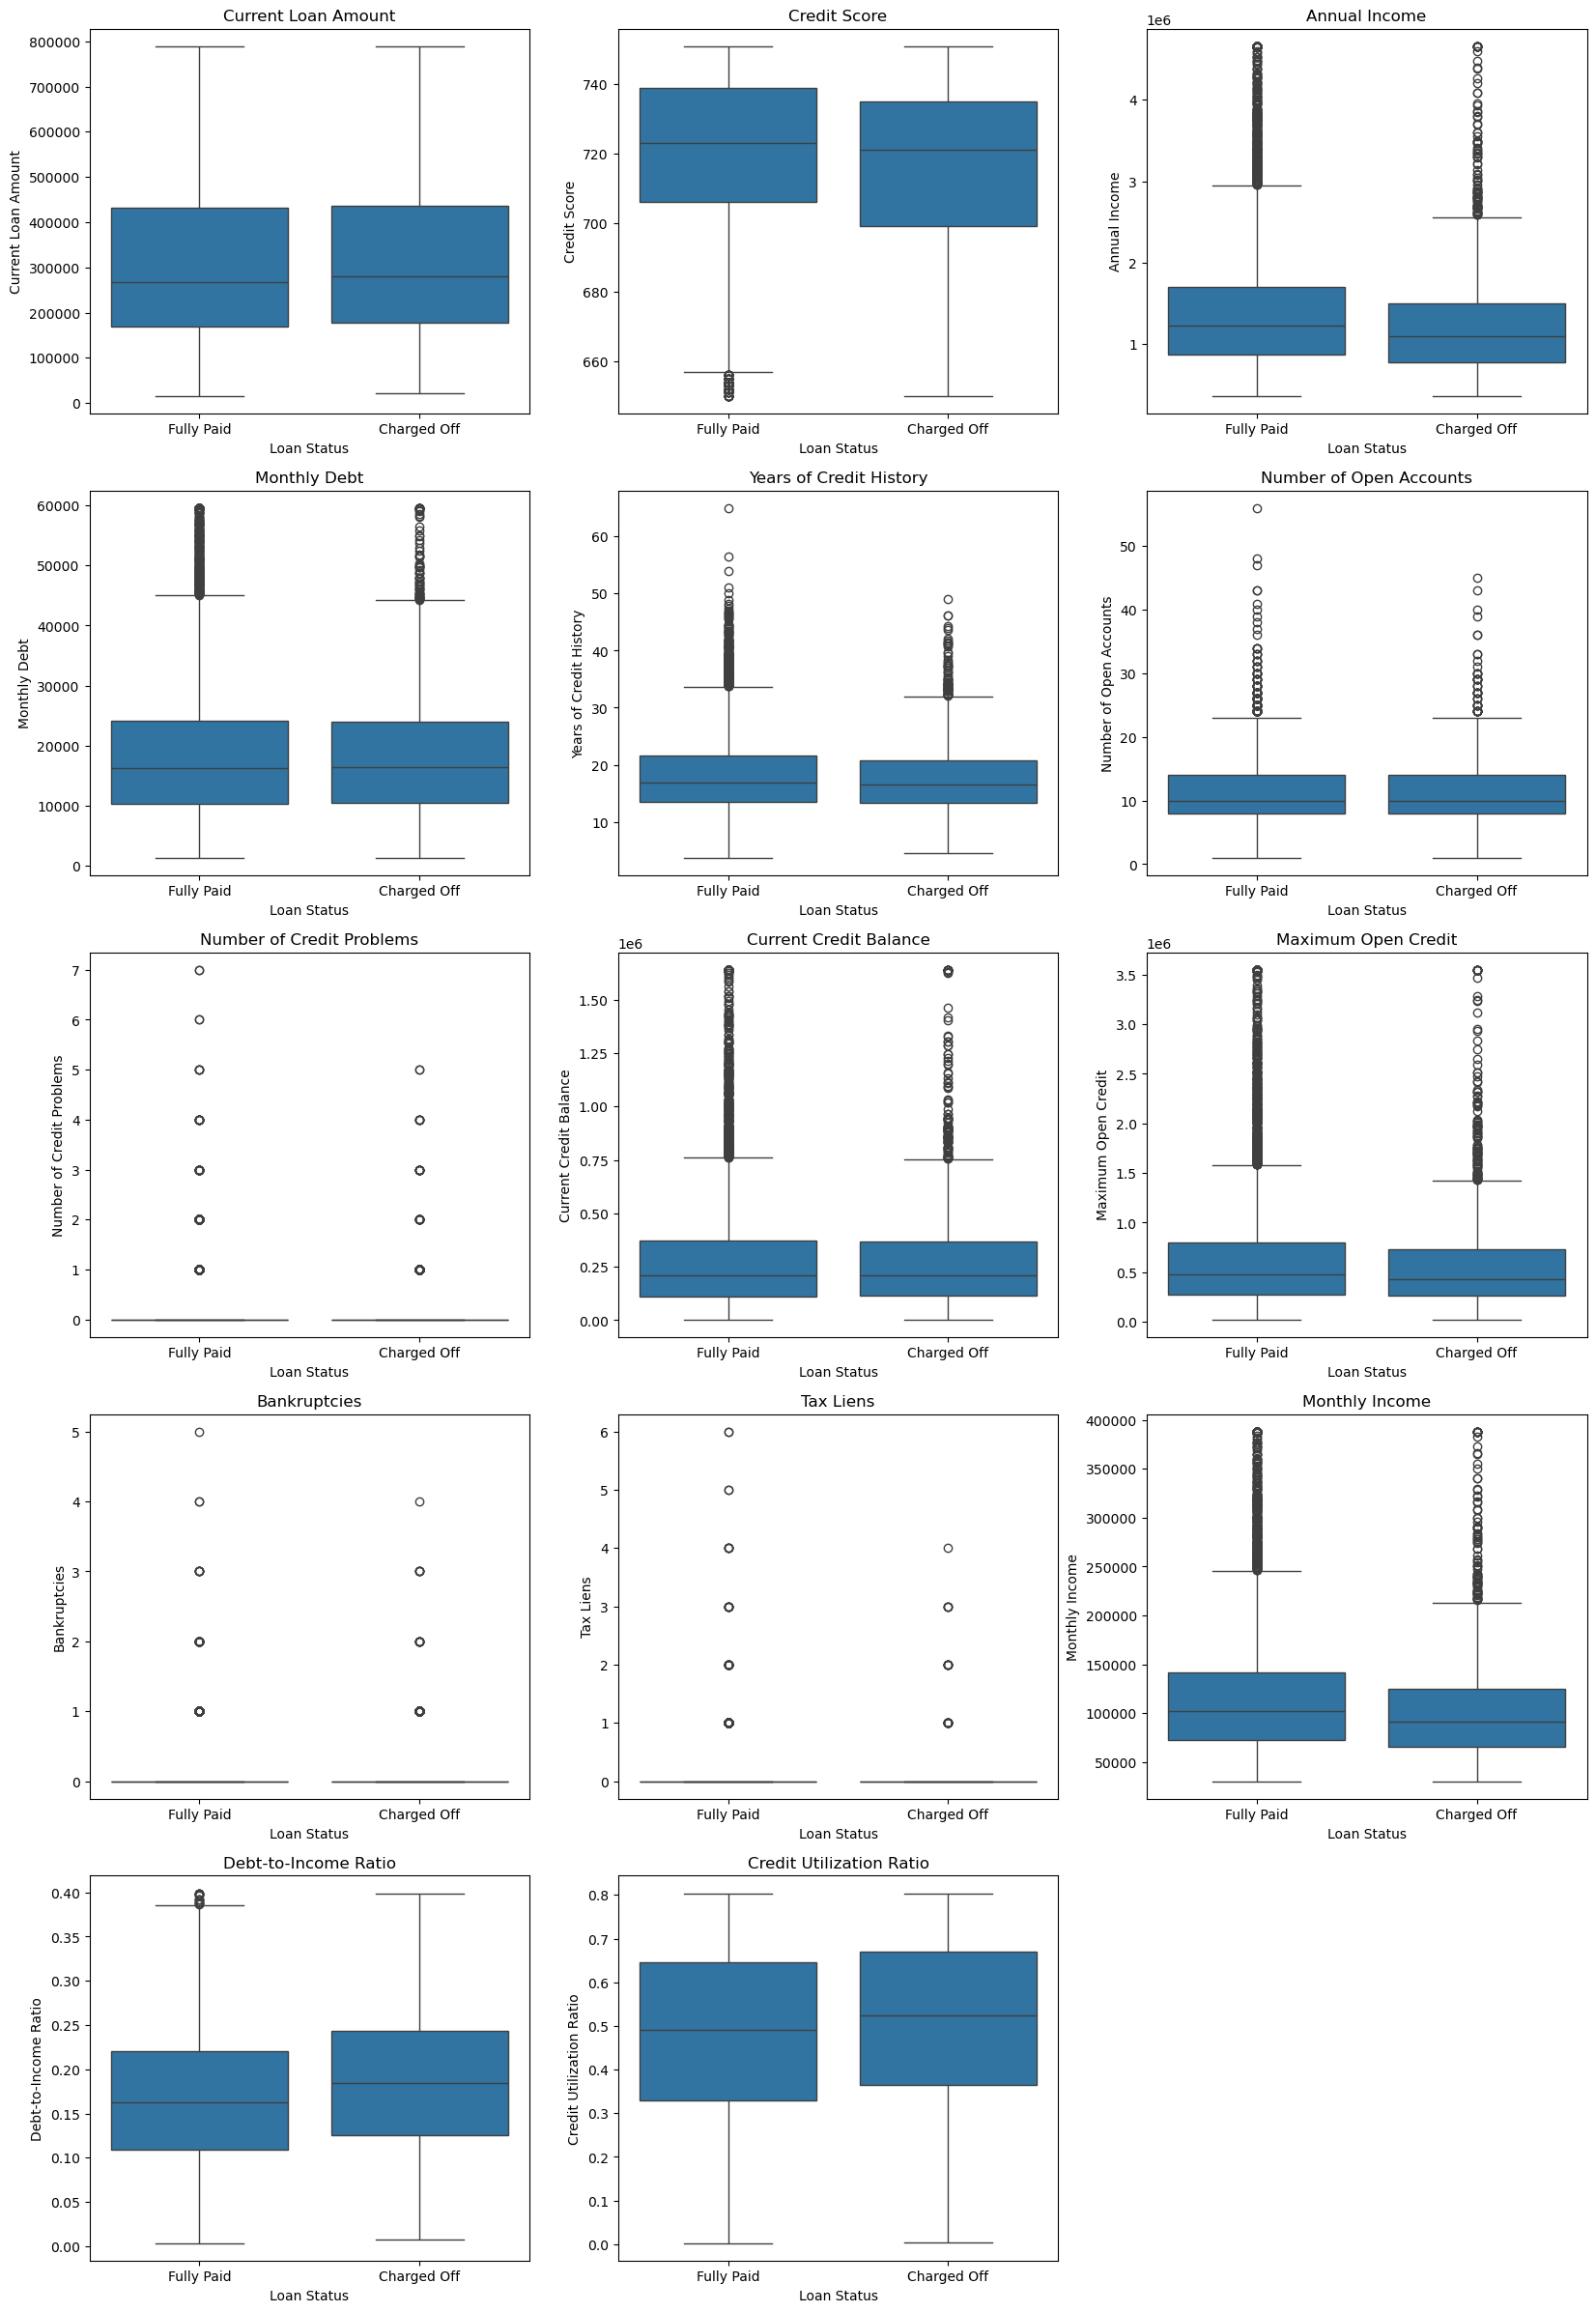

In [9]:
fig = plt.figure(figsize=(20,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,3,counter+1)
    g = sb.boxplot(x="Loan Status", y=col, data=credit_data)
    plt.title(f'{col}')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
    counter = counter + 1

Key Predictive Features for Loan Default

`Credit Score`
- Fully Paid loans consistently show higher credit scores compared to Charged Off loans.
- Charged Off loans display a wider spread and lower minimum values.
- **Interpretation:** Credit score can be a good predictor. Borrowers with lower scores are more likely to default.

`Annual/Monthly Income`  
- Fully Paid loans show higher annual and monthly income levels.  
- **Interpretation:** Income can be a useful predictor. 

`Debt-to-Income Ratio`
- Median DTI is higher among Charged Off loans.
- **Interpretation:** Higher DTI values can reflect financial burden and be linked to greater likelihood of default. 

`Credit Utilization Ratio`
- Charged Off loans show slightly higher median utilization. 
- **Interpretation:** Higher utilization ratios may signal overreliance on credit, which can lead to increased risk of default.

These insights are useful for feature selection and understanding risk factors when building predictive models for loan default classification.


## 5. Exploring Categorical Features 

### A. Explore data distribution for Categorical Features 

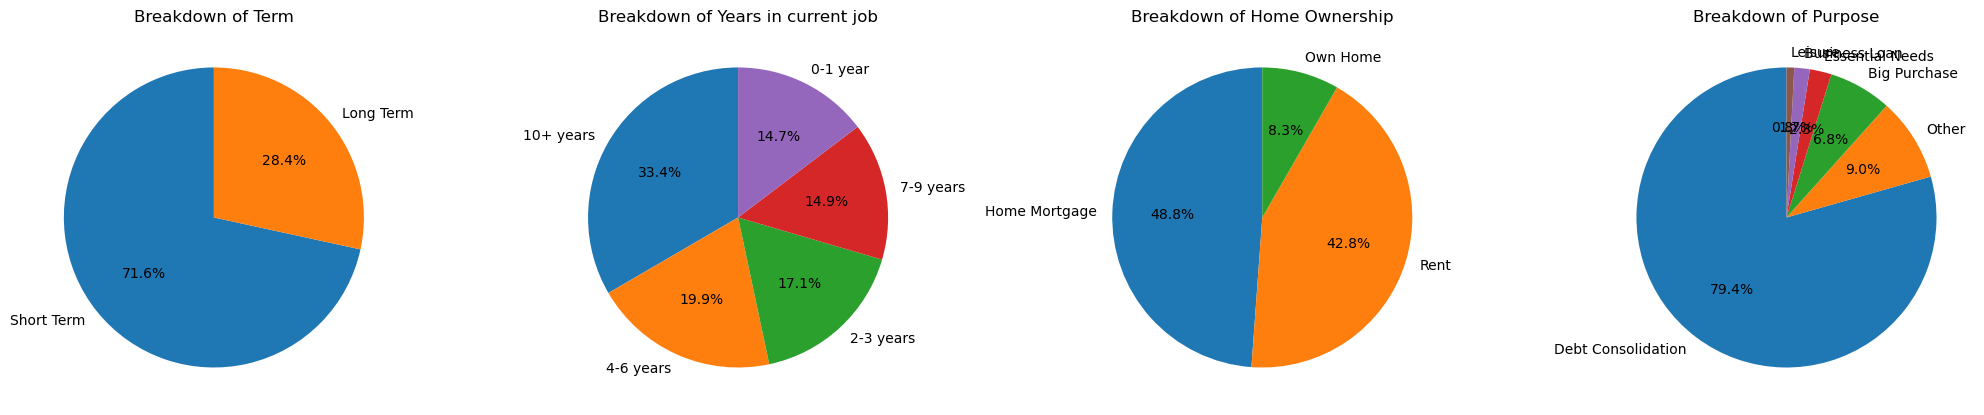

In [10]:
# Visualising categorical predictors 
def plot_overall_pie_charts(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

    if n == 1:
        axes = [axes]  # handle single-column case

    for i, column in enumerate(columns):
        data = df[column].dropna().str.strip()
        counts = data.value_counts(normalize=True) * 100
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Breakdown of {column}')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
plot_overall_pie_charts(credit_data, columns_to_plot)

### B. Explore relationship with Loan Default

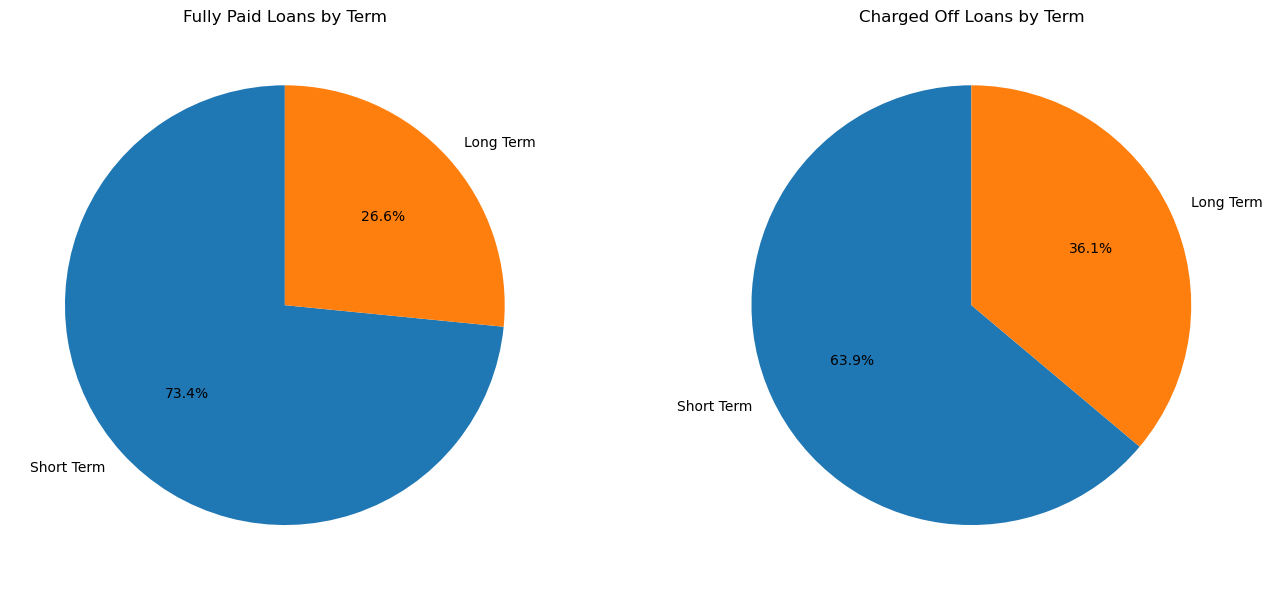

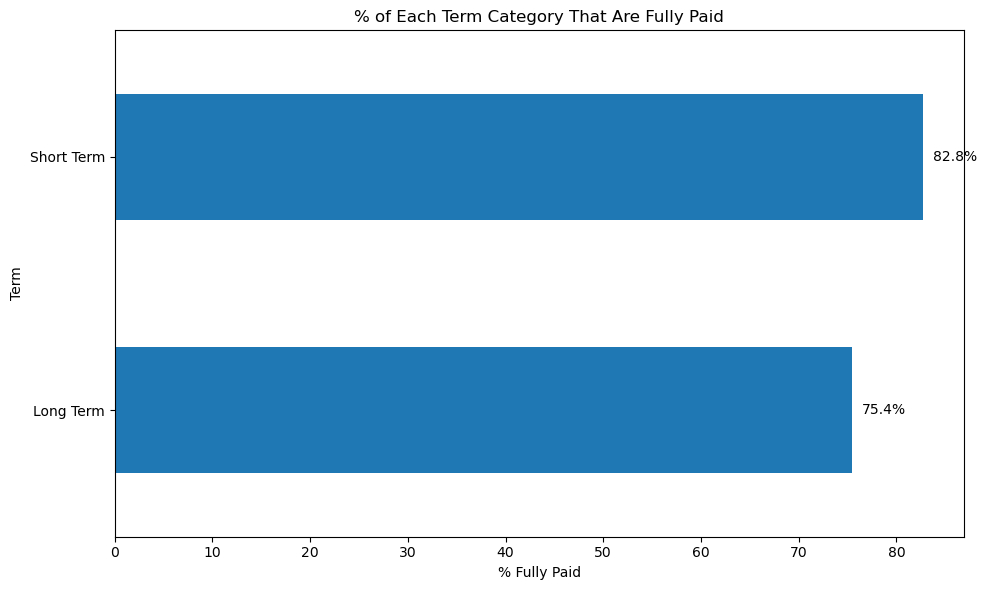

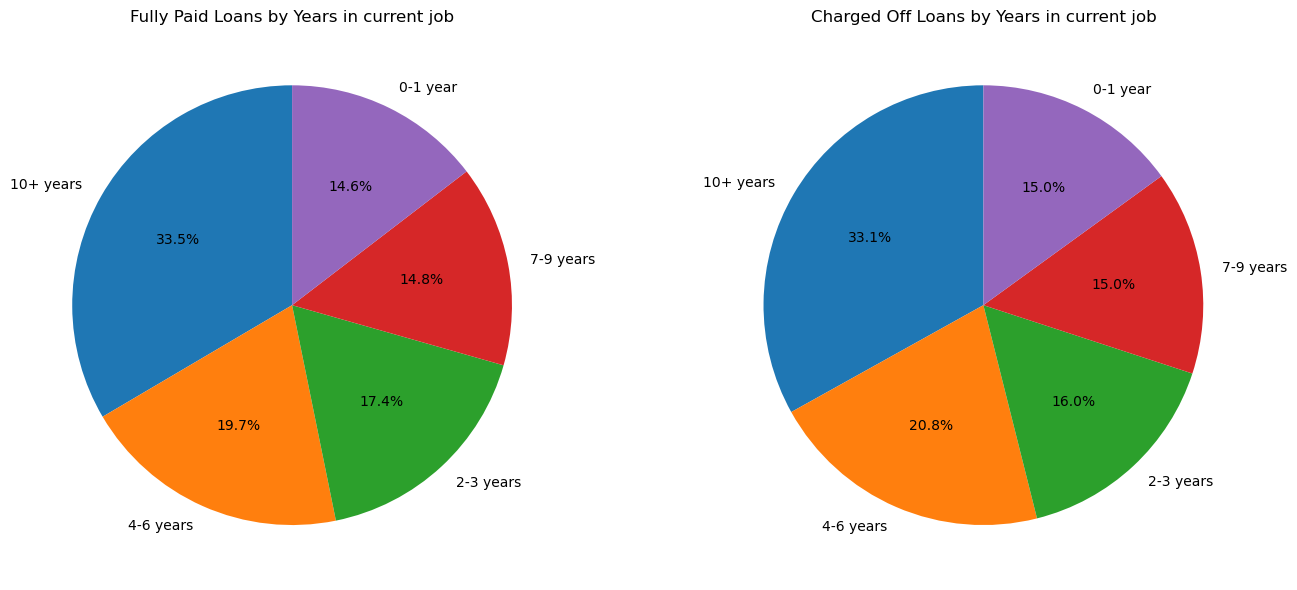

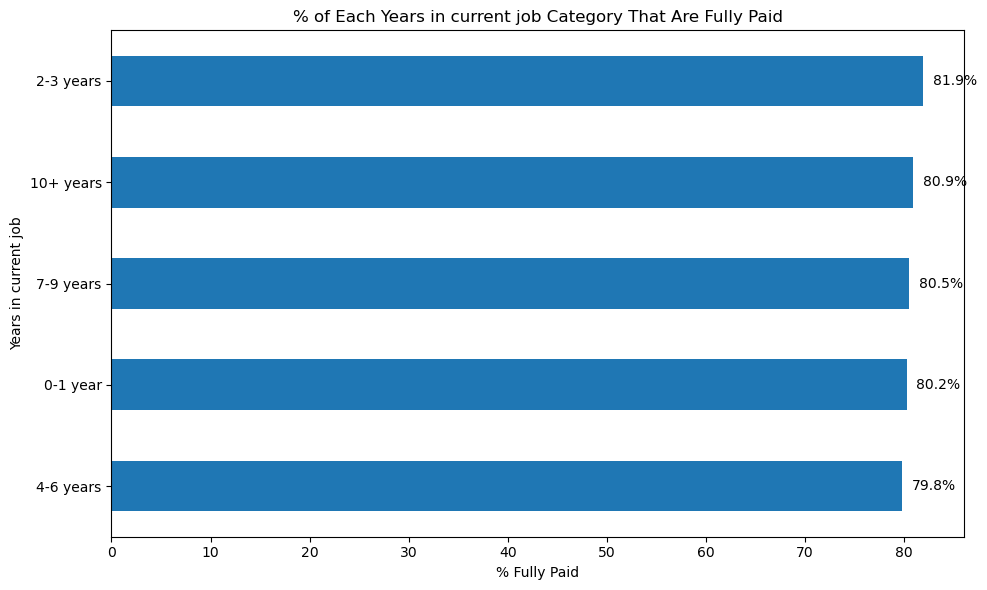

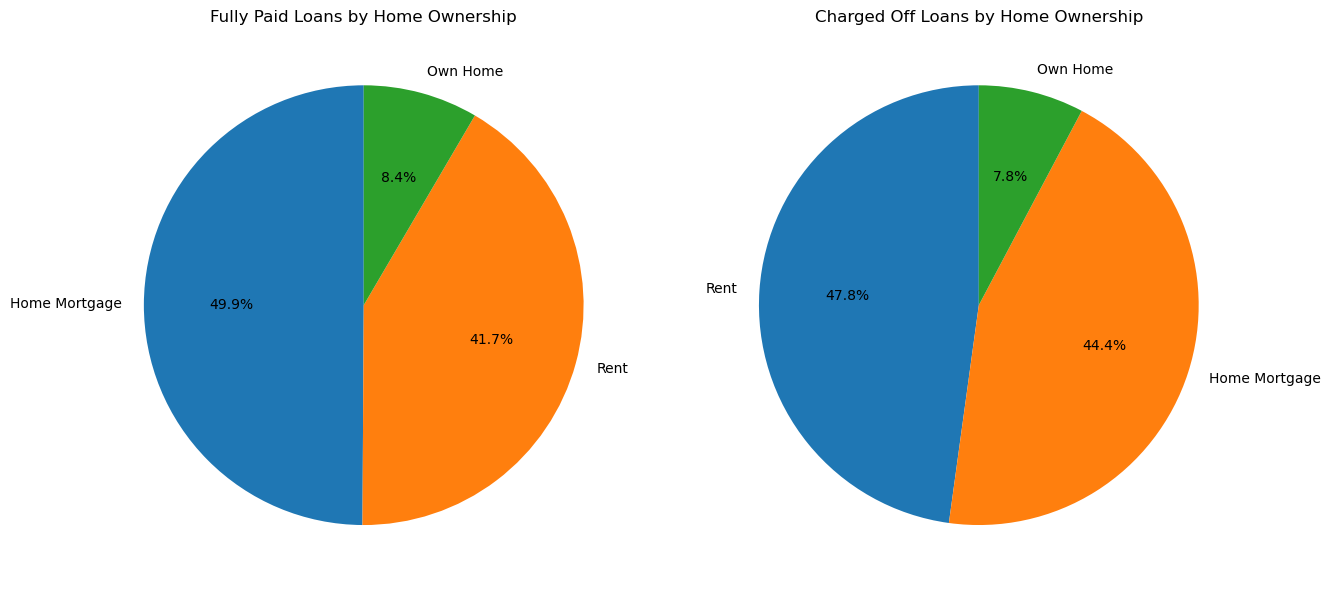

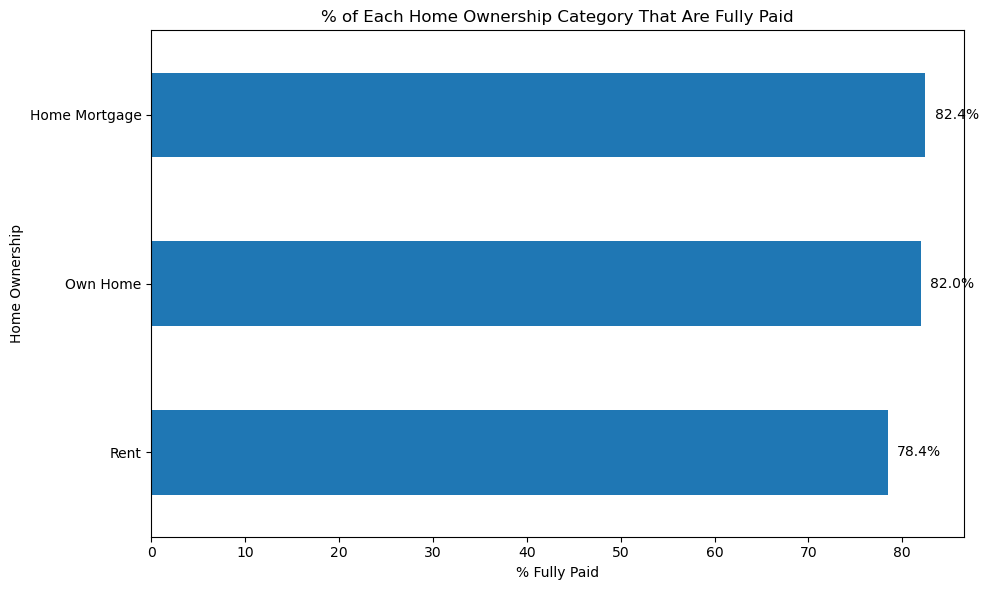

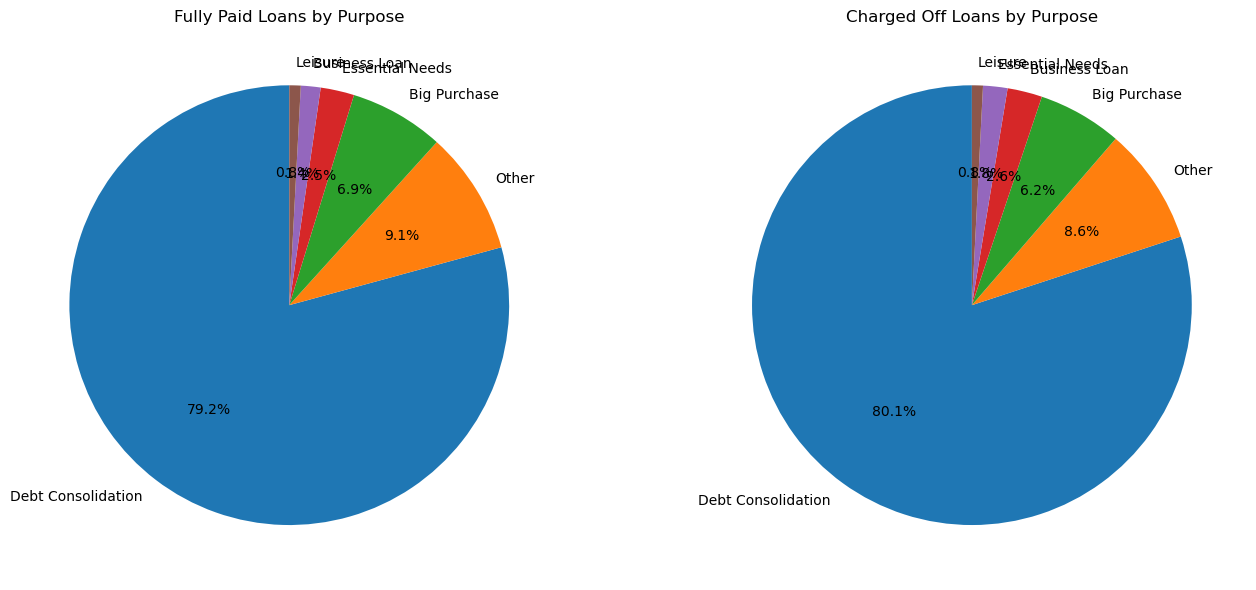

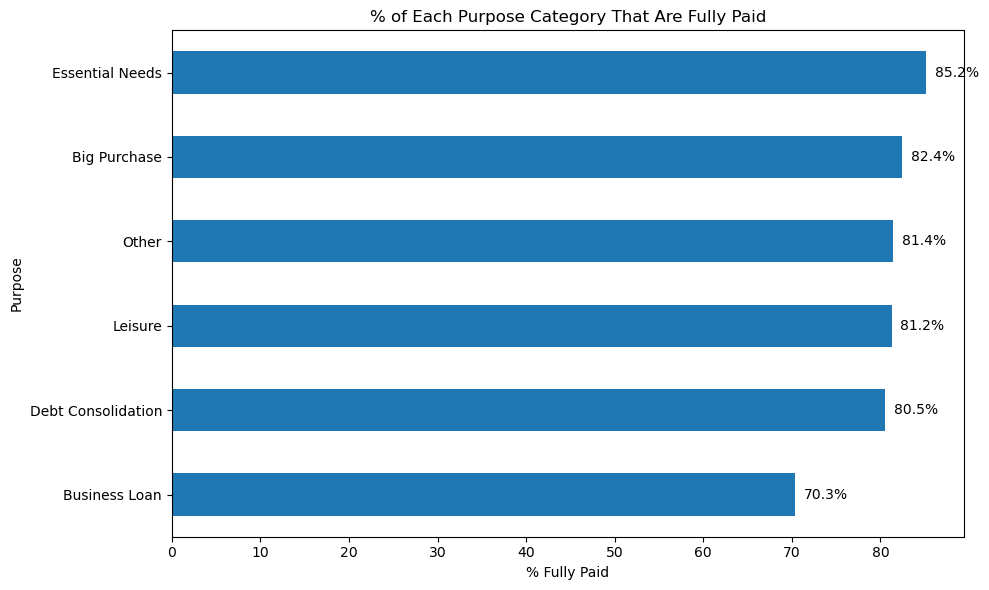

In [11]:
# Function to visualise relationship between categorical predictors and Loan Status  
def plot_loan_status_analysis(df, column):
    # Drop rows with missing values in the target column
    df_clean = df.dropna(subset=[column, 'Loan Status'])

    # Pie Charts
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, status in enumerate(['Fully Paid', 'Charged Off']):
        counts = df_clean[df_clean['Loan Status'] == status][column].value_counts(normalize=True) * 100
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{status} Loans by {column}')
    plt.tight_layout()
    plt.show()

    # Bar Chart: % of each group that are Fully Paid
    group_counts = df_clean.groupby([column, 'Loan Status']).size().unstack(fill_value=0)
    fully_paid_percent = (group_counts['Fully Paid'] / group_counts.sum(axis=1)) * 100
    fully_paid_percent = fully_paid_percent.sort_values()
    ax = fully_paid_percent.plot(kind='barh', figsize=(10, 6)) # Plot
    plt.xlabel('% Fully Paid')
    plt.title(f'% of Each {column} Category That Are Fully Paid')

    for i, v in enumerate(fully_paid_percent): # Add percentage labels
        ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot graphs
plot_loan_status_analysis(credit_data, 'Term')
plot_loan_status_analysis(credit_data, 'Years in current job')
plot_loan_status_analysis(credit_data, 'Home Ownership')
plot_loan_status_analysis(credit_data, 'Purpose')


### Observations: 
- `Purpose`: A lower percentage of Business Loans are fully paid (around 70% fully paid) as compared to all other loan types (around 80% fully paid). 
- `Term Category`: A higher percentage of Short Term loans are fully paid (82%) as compared to Long Term loans (76%)